In [1]:
from src.mheatmap.constants import set_test_mode
set_test_mode(True)


In [2]:
from src.mheatmap.graph._spectral_permute import two_walk_laplacian

import numpy as np

def test_two_walk_laplacian():
    """
    Test the two_walk_laplacian function by printing the inputs and outputs.
    """
    # Test Case 1: Small Bipartite Graph
    print("Test Case 1: Small Bipartite Graph")
    B = np.array([
        [1, 0],
        [0, 1],
        [1, 1]
    ])
    L_tw = two_walk_laplacian(B)
    print("Input adjacency matrix B:")
    print(B)
    print("Computed two-walk Laplacian L_tw:")
    print(L_tw)
    print("\n")

    # Test Case 2: Another Small Bipartite Graph
    print("Test Case 2: Another Small Bipartite Graph")
    B = np.array([
        [0, 0],
        [1, 0],
        [1, 1]
    ])
    L_tw = two_walk_laplacian(B)
    print("Input adjacency matrix B:")
    print(B)
    print("Computed two-walk Laplacian L_tw:")
    print(L_tw)
    print("\n")

    # Test Case 3: Empty Bipartite Graph
    print("Test Case 3: Empty Bipartite Graph")
    B = np.zeros((3, 2))
    L_tw = two_walk_laplacian(B)
    print("Input adjacency matrix B:")
    print(B)
    print("Computed two-walk Laplacian L_tw:")
    print(L_tw)
    print("\n")

    # Test Case 4: Larger Bipartite Graph
    print("Test Case 4: Larger Bipartite Graph")
    B = np.array([
        [1, 0, 1],
        [0, 1, 1],
        [1, 1, 0],
        [0, 1, 0]
    ])
    L_tw = two_walk_laplacian(B)
    print("Input adjacency matrix B:")
    print(B)
    print("Computed two-walk Laplacian L_tw:")
    print(L_tw)
    print("\n")

    # Test Case 5: Random Bipartite Graph
    print("Test Case 5: Random Bipartite Graph")
    np.random.seed(42)  # For reproducibility
    B = np.random.randint(0, 2, size=(5, 4))
    L_tw = two_walk_laplacian(B)
    print("Input adjacency matrix B:")
    print(B)
    print("Computed two-walk Laplacian L_tw:")
    print(L_tw)
    print("\n")

# Run the test function
test_two_walk_laplacian()

Test Case 1: Small Bipartite Graph
Input adjacency matrix B:
[[1 0]
 [0 1]
 [1 1]]
Computed two-walk Laplacian L_tw:
[[ 2  0 -1 -1  0]
 [ 0  2 -1  0 -1]
 [-1 -1  4 -1 -1]
 [-1  0 -1  3 -1]
 [ 0 -1 -1 -1  3]]


Test Case 2: Another Small Bipartite Graph
Input adjacency matrix B:
[[0 0]
 [1 0]
 [1 1]]
Computed two-walk Laplacian L_tw:
[[ 0  0  0  0  0]
 [ 0  2 -1 -1  0]
 [ 0 -1  3 -1 -1]
 [ 0 -1 -1  3 -1]
 [ 0  0 -1 -1  2]]


Test Case 3: Empty Bipartite Graph
Input adjacency matrix B:
[[0. 0.]
 [0. 0.]
 [0. 0.]]
Computed two-walk Laplacian L_tw:
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


Test Case 4: Larger Bipartite Graph
Input adjacency matrix B:
[[1 0 1]
 [0 1 1]
 [1 1 0]
 [0 1 0]]
Computed two-walk Laplacian L_tw:
[[ 4 -1 -1  0 -1  0 -1]
 [-1  5 -1 -1  0 -1 -1]
 [-1 -1  5 -1 -1 -1  0]
 [ 0 -1 -1  3  0 -1  0]
 [-1  0 -1  0  4 -1 -1]
 [ 0 -1 -1 -1 -1  5 -1]
 [-1 -1  0  0 -1 -1  4]]


Test Case 5: Random Bipartite Graph
Input adjacency 

In [3]:
from src.mheatmap.graph._copermute_from_bipermute import copermute_from_bipermute

import numpy as np

def test_copermute_from_bipermute():
    """
    Test the _copermute_from_bipermute function and verify whether the reconstructed
    permutation matches the original p_Asub.
    """
    def run_test_case(B_sizes, B_subrows, B_subcols, p_Asub):
        print("\n=== Running Test Case ===")
        print("B_sizes:", B_sizes)
        print("B_subrows:", B_subrows)
        print("B_subcols:", B_subcols)
        print("p_Asub (input):", p_Asub)
        
        # Run the function
        p_Brows, p_Bcols = copermute_from_bipermute(B_sizes, B_subrows, B_subcols, p_Asub)
        
        print("p_Brows (output):", p_Brows)
        print("p_Bcols (output):", p_Bcols)

    # Test Case 1: Entire matrix as submatrix
    m, n = 5, 4
    B_sizes = [m, n]
    B_subrows = np.arange(0, m)
    B_subcols = np.arange(0, n)
    p_Asub = np.random.permutation(m + n)
    run_test_case(B_sizes, B_subrows, B_subcols, p_Asub)

    # Test Case 2: Smaller submatrix
    B_subrows = np.array([1, 3])
    B_subcols = np.array([2, 4])
    p_Asub = np.random.permutation(len(B_subrows) + len(B_subcols))
    run_test_case(B_sizes, B_subrows, B_subcols, p_Asub)

    # Test Case 3: Edge case with empty submatrix
    B_subrows = np.array([], dtype=int)
    B_subcols = np.array([], dtype=int)
    p_Asub = np.array([], dtype=int)
    run_test_case(B_sizes, B_subrows, B_subcols, p_Asub)

    print("\nAll tests passed!")

# Run the test function
test_copermute_from_bipermute()


=== Running Test Case ===
B_sizes: [5, 4]
B_subrows: [0 1 2 3 4]
B_subcols: [0 1 2 3]
p_Asub (input): [7 2 0 8 6 3 1 4 5]
p_Brows (output): [2 0 3 1 4]
p_Bcols (output): [2 3 1 0]

=== Running Test Case ===
B_sizes: [5, 4]
B_subrows: [1 3]
B_subcols: [2 4]
p_Asub (input): [0 2 1 3]
p_Brows (output): [1 3 0 2 4]
p_Bcols (output): [2 4 0 1 3]

=== Running Test Case ===
B_sizes: [5, 4]
B_subrows: []
B_subcols: []
p_Asub (input): []
p_Brows (output): [0 1 2 3 4]
p_Bcols (output): [0 1 2 3]

All tests passed!


In [4]:


import numpy as np
import pandas as pd
from src.mheatmap import (
    amc_postprocess, 
    mosaic_heatmap,
    mask_zeros_from_gt
)
from src.mheatmap.graph import spectral_permute
import matplotlib.pyplot as plt
import scipy

from sklearn.metrics import confusion_matrix

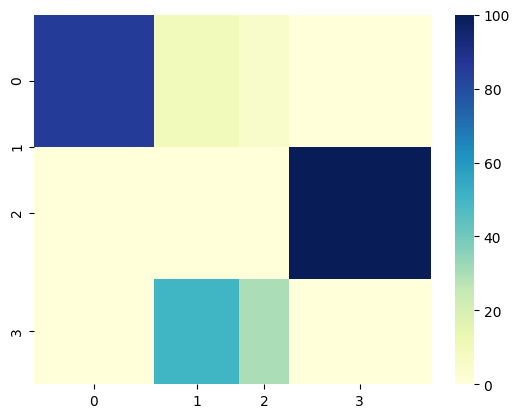

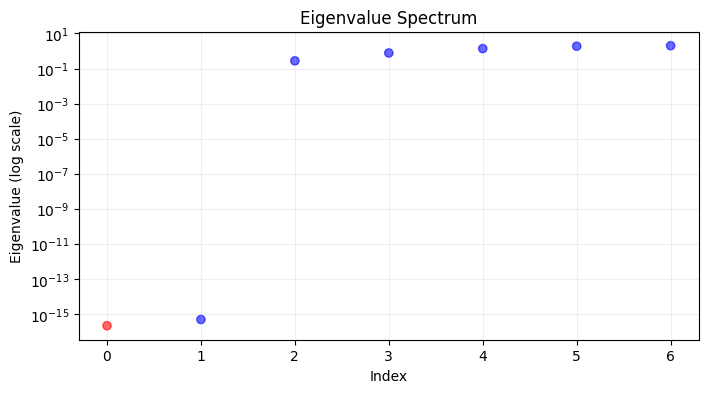

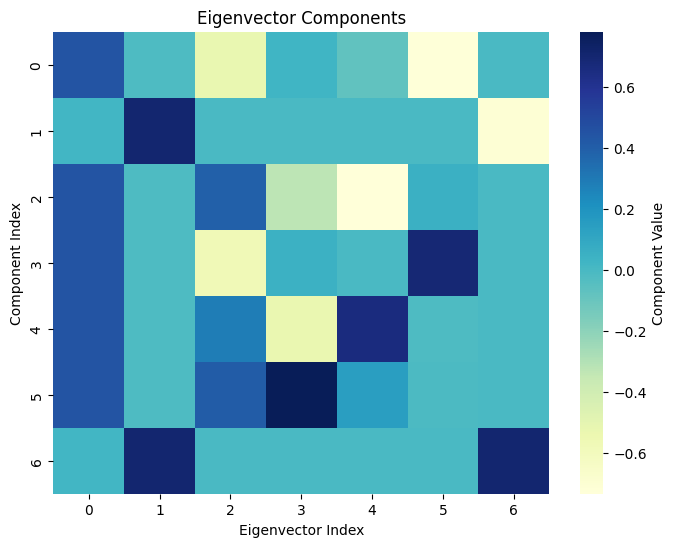

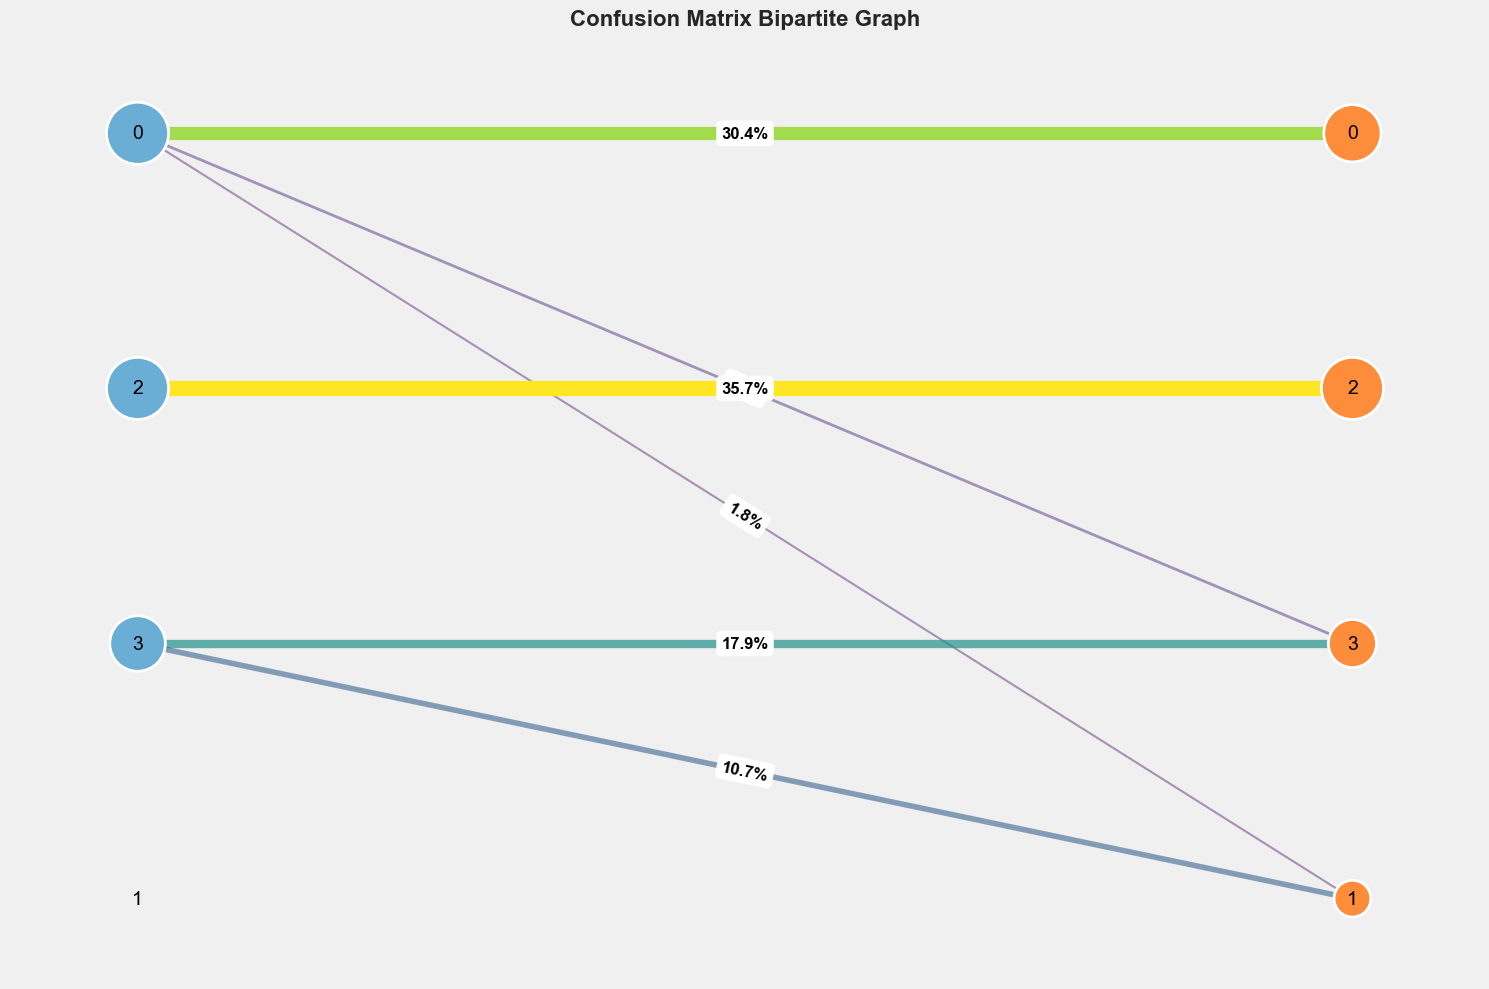

<Axes: >

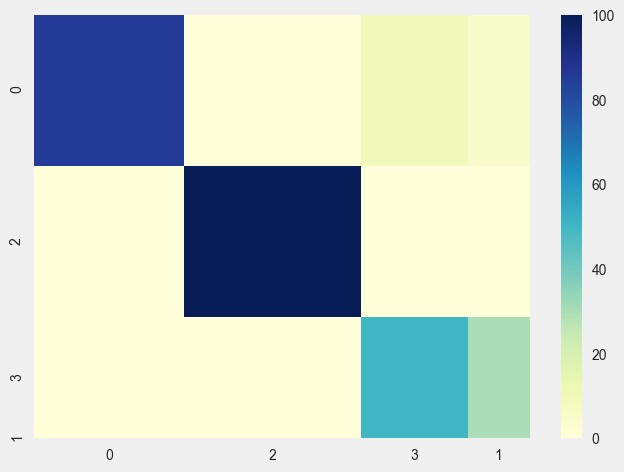

In [5]:
conf_mat = np.array([
    [85, 10, 5,   0],  # High accuracy for class 0 
    [0,   0,  0,  0],  # Empty row representing unused class
    [0,   0,  0, 100],
    [0,  50, 30,  0],  # Some confusion between classes 1 and 2
])

mosaic_heatmap(conf_mat, cmap="YlGnBu")

labels = np.array([0, 1, 2, 3])

reordered_mat, reordered_labels = spectral_permute(conf_mat, labels, mode='tw')

mosaic_heatmap(reordered_mat, xticklabels=reordered_labels, yticklabels=reordered_labels, cmap="YlGnBu")

In [6]:

# Load the data
y_true = scipy.io.loadmat("docs/examples/data/Salinas_gt.mat")["salinas_gt"].reshape(-1)
# Load predicted labels from spectral clustering
y_pred = np.array(
    pd.read_csv(
        "docs/examples/data/Salinas_spectralclustering.csv",
        header=None,
        low_memory=False,
    )
    .values[1:]
    .flatten()
)
print(f"y_true shape: {y_true.shape}")
print(f"y_pred shape: {len(y_pred)}")

print(np.unique(y_true))

# unique count for y_true
unique_vals, counts = np.unique(y_true, return_counts=True)
print("\nUnique values and their counts in y_true:")
print("-" * 40)
for val, count in zip(unique_vals, counts):
    print(f"Value {val:2d}: {count:6d} occurrences")


y_true shape: (111104,)
y_pred shape: 111104
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]

Unique values and their counts in y_true:
----------------------------------------
Value  0:  56975 occurrences
Value  1:   2009 occurrences
Value  2:   3726 occurrences
Value  3:   1976 occurrences
Value  4:   1394 occurrences
Value  5:   2678 occurrences
Value  6:   3959 occurrences
Value  7:   3579 occurrences
Value  8:  11271 occurrences
Value  9:   6203 occurrences
Value 10:   3278 occurrences
Value 11:   1068 occurrences
Value 12:   1927 occurrences
Value 13:    916 occurrences
Value 14:   1070 occurrences
Value 15:   7268 occurrences
Value 16:   1807 occurrences


<Axes: >

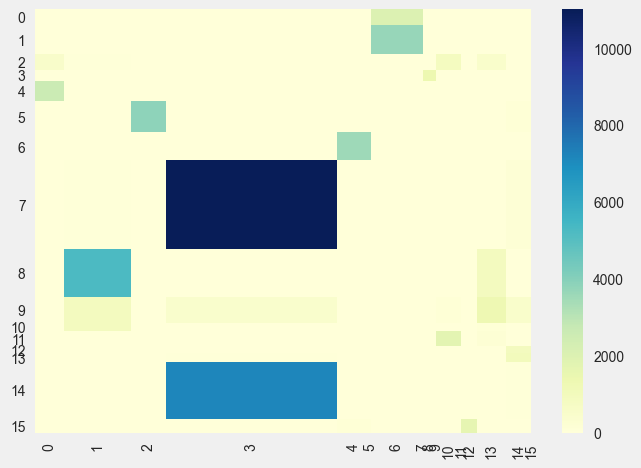

In [7]:
masked_y_true = mask_zeros_from_gt(y_true, y_true)
masked_y_pred = mask_zeros_from_gt(y_pred + 1, y_true)

raw_conf_mat = confusion_matrix(masked_y_true, masked_y_pred)

mosaic_heatmap(raw_conf_mat, cmap="YlGnBu")


<Axes: >

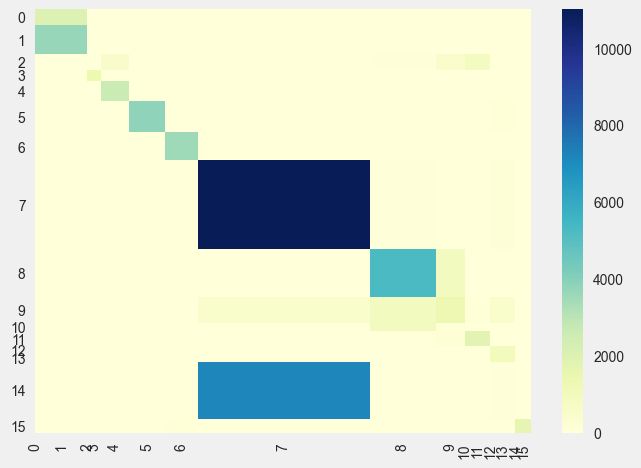

In [8]:
# AMC post-processing
_, conf_mat, labels = amc_postprocess(y_pred, y_true)

mosaic_heatmap(conf_mat, cmap="YlGnBu")

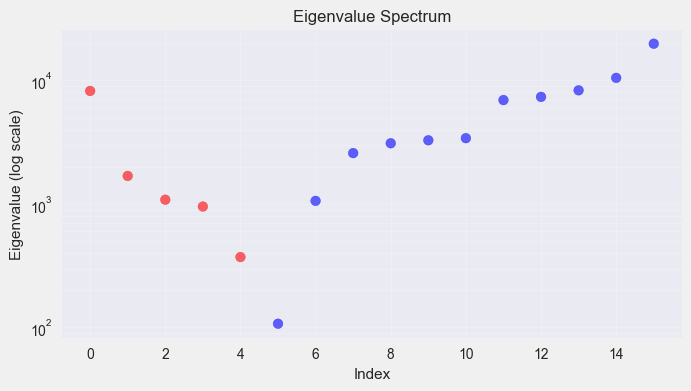

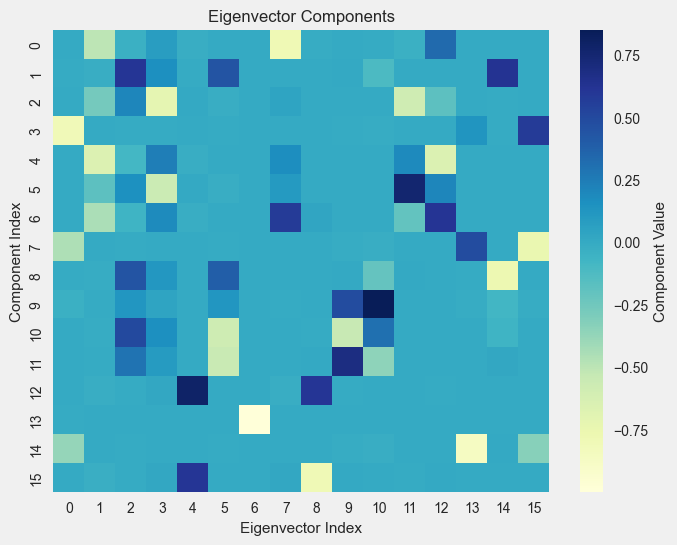

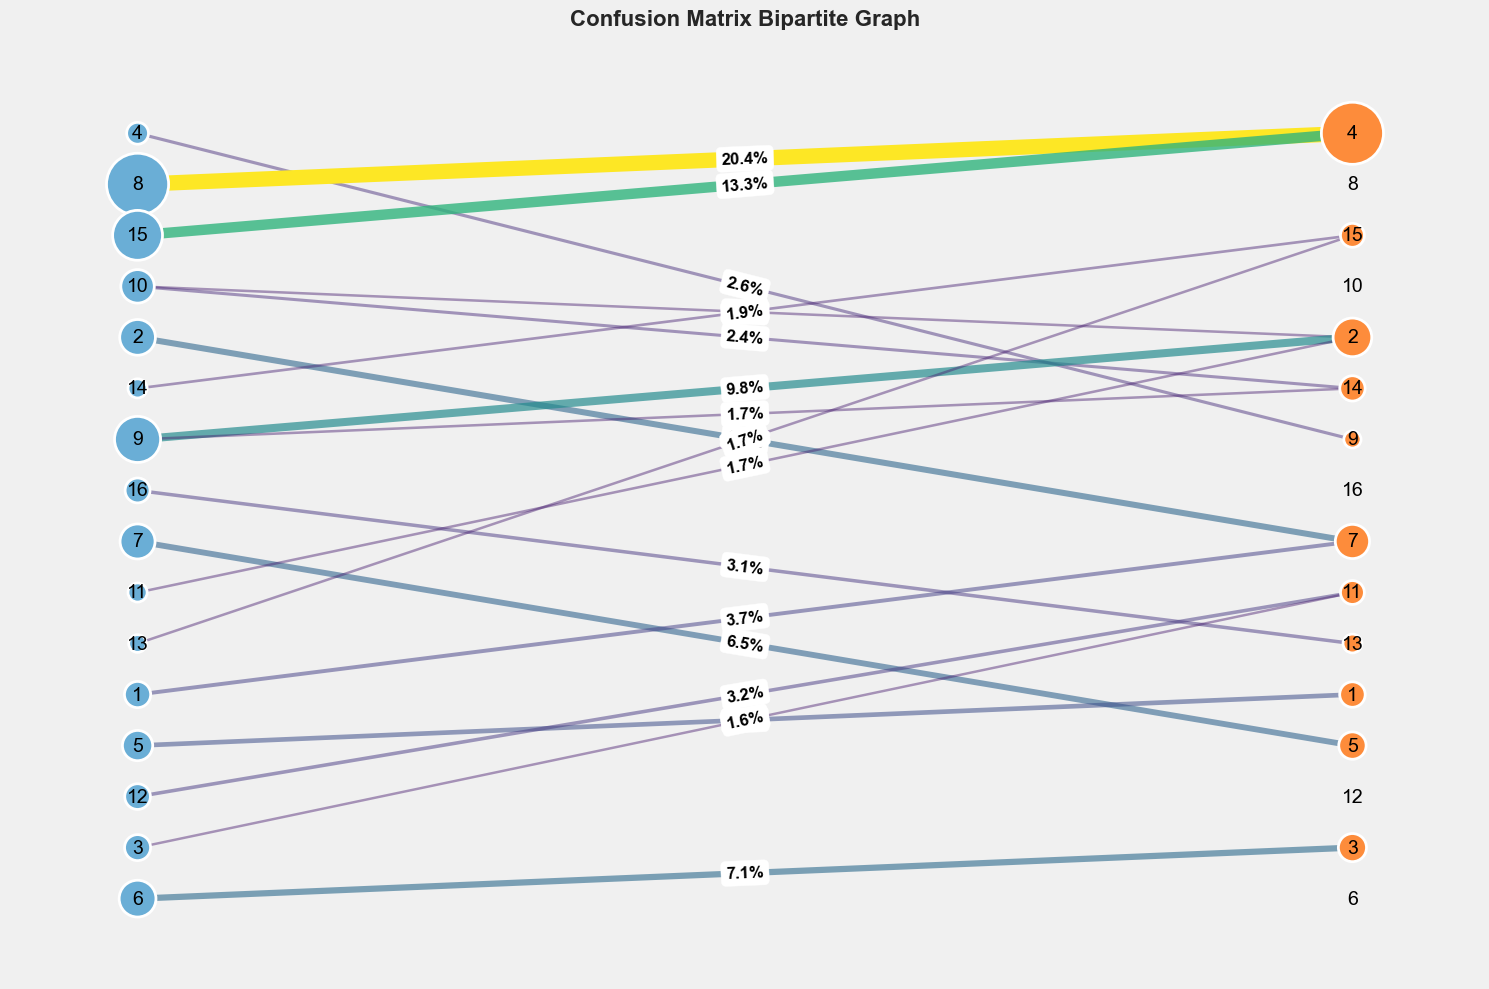

In [9]:
# spectral reordering
reordered_mat, reordered_labels = spectral_permute(raw_conf_mat, labels, mode='fiedler')


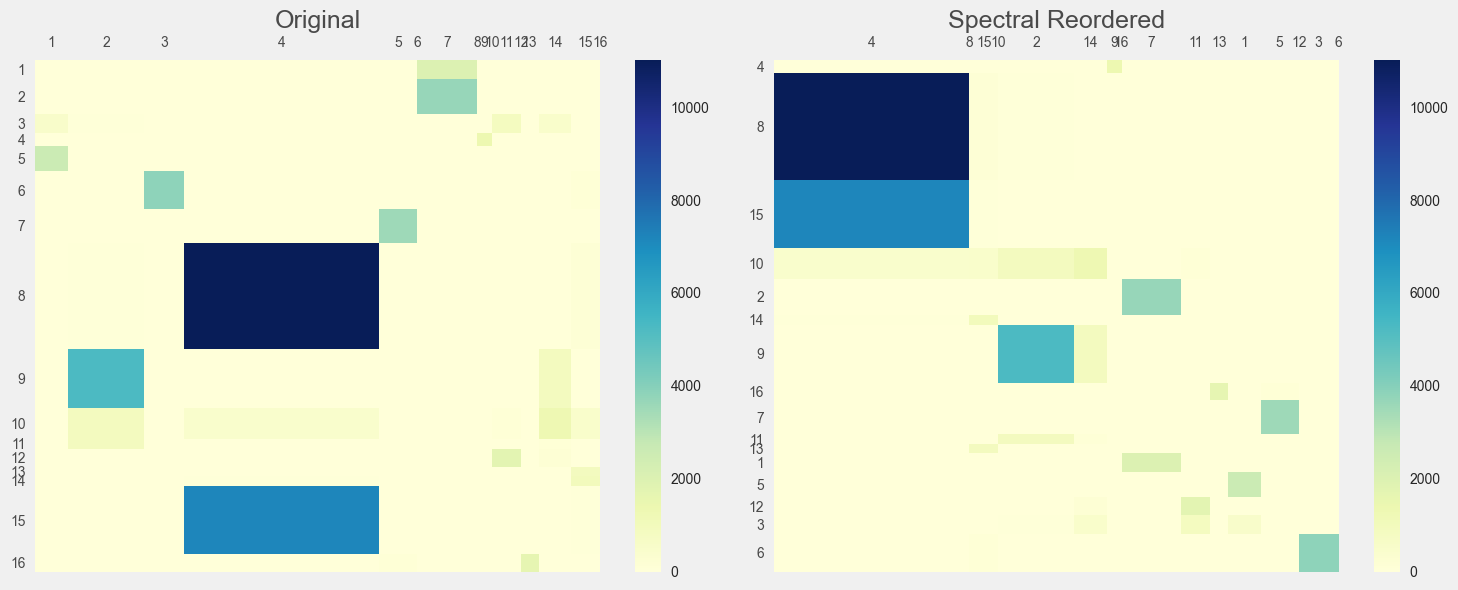

In [10]:
# Visualize original vs spectrally reordered matrices
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

mosaic_heatmap(raw_conf_mat, ax=ax1, xticklabels=labels, yticklabels=labels, cmap="YlGnBu")
ax1.set_title("Original", fontsize=18, color='#4A4A4A')  # Medium gray
ax1.xaxis.set_ticks_position('top')
ax1.tick_params(colors='#4A4A4A')

mosaic_heatmap(
    reordered_mat,
    ax=ax2,
    xticklabels=reordered_labels,
    yticklabels=reordered_labels,
    cmap="YlGnBu",
)
ax2.set_title("Spectral Reordered", fontsize=18, color='#4A4A4A')  # Medium gray
ax2.xaxis.set_ticks_position('top')
ax2.tick_params(colors='#4A4A4A')

plt.tight_layout()
plt.show()

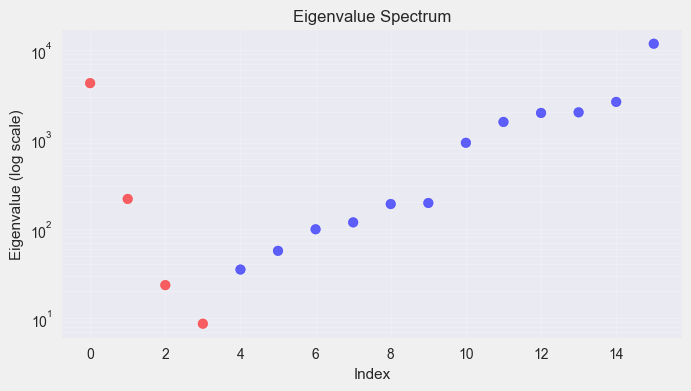

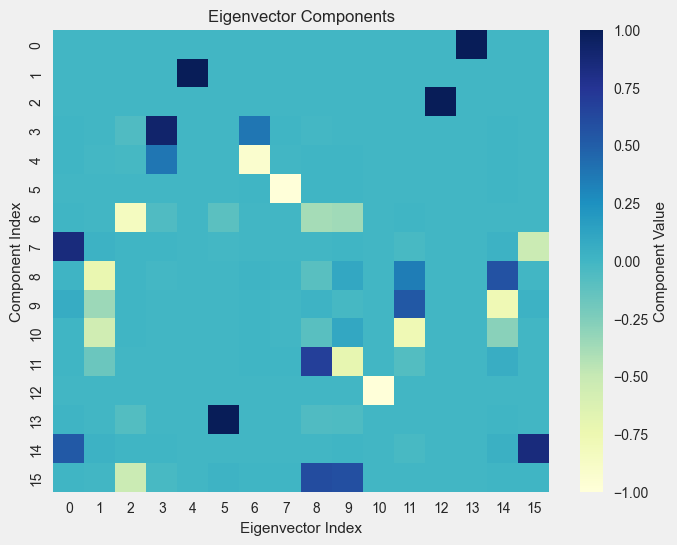

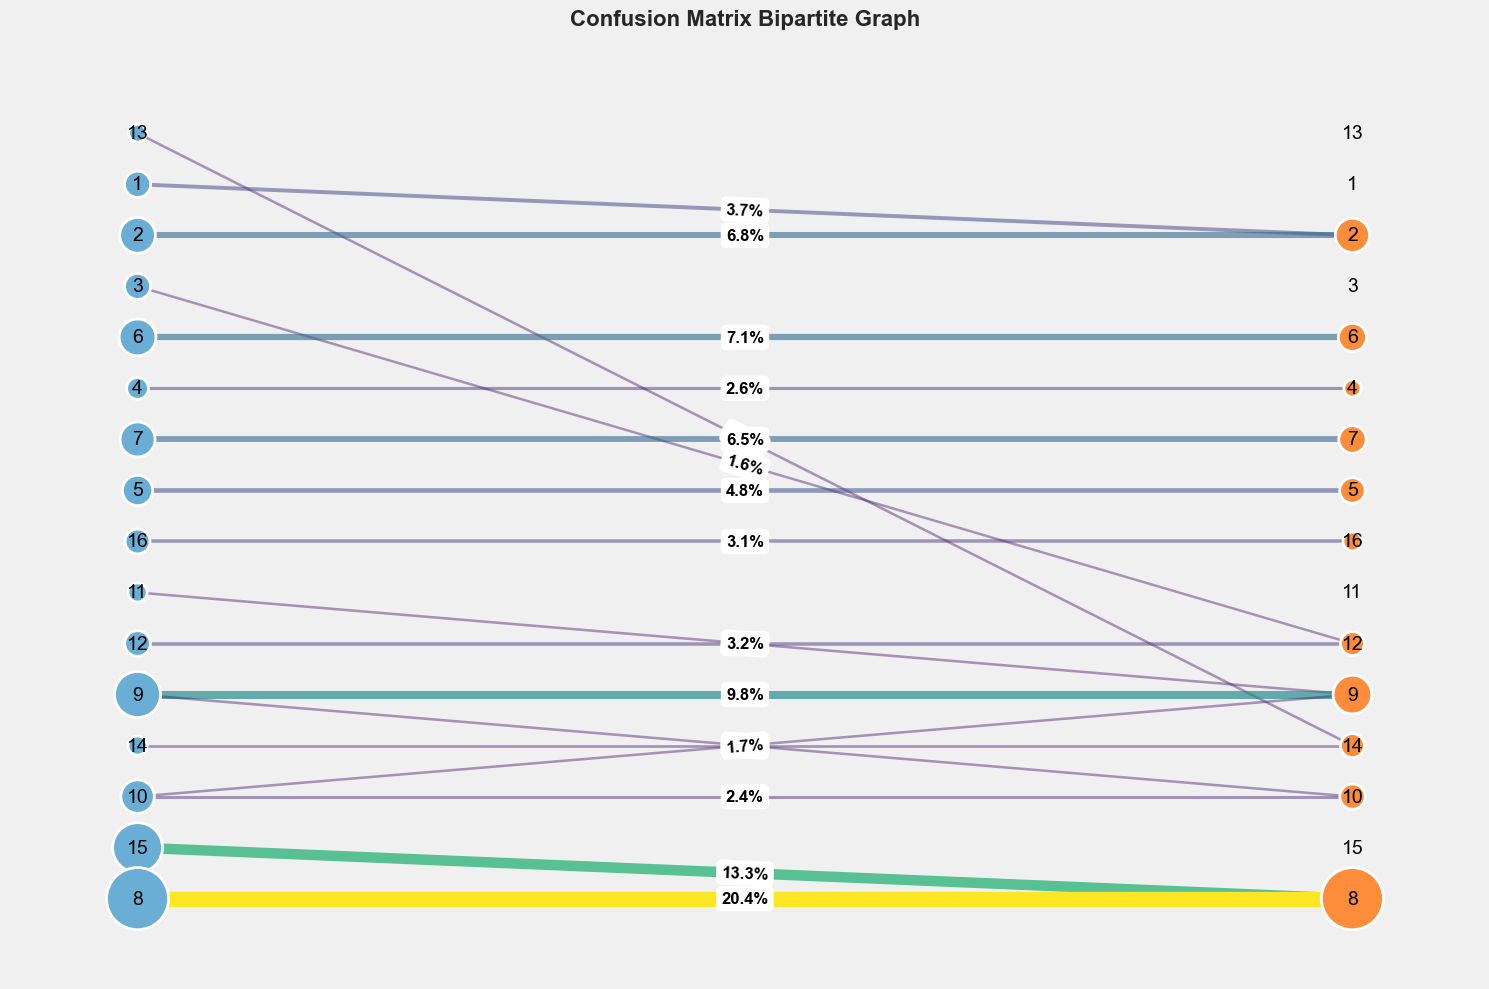

In [11]:
# spectral reordering
reordered_mat, reordered_labels = spectral_permute(conf_mat, labels, mode='fiedler')


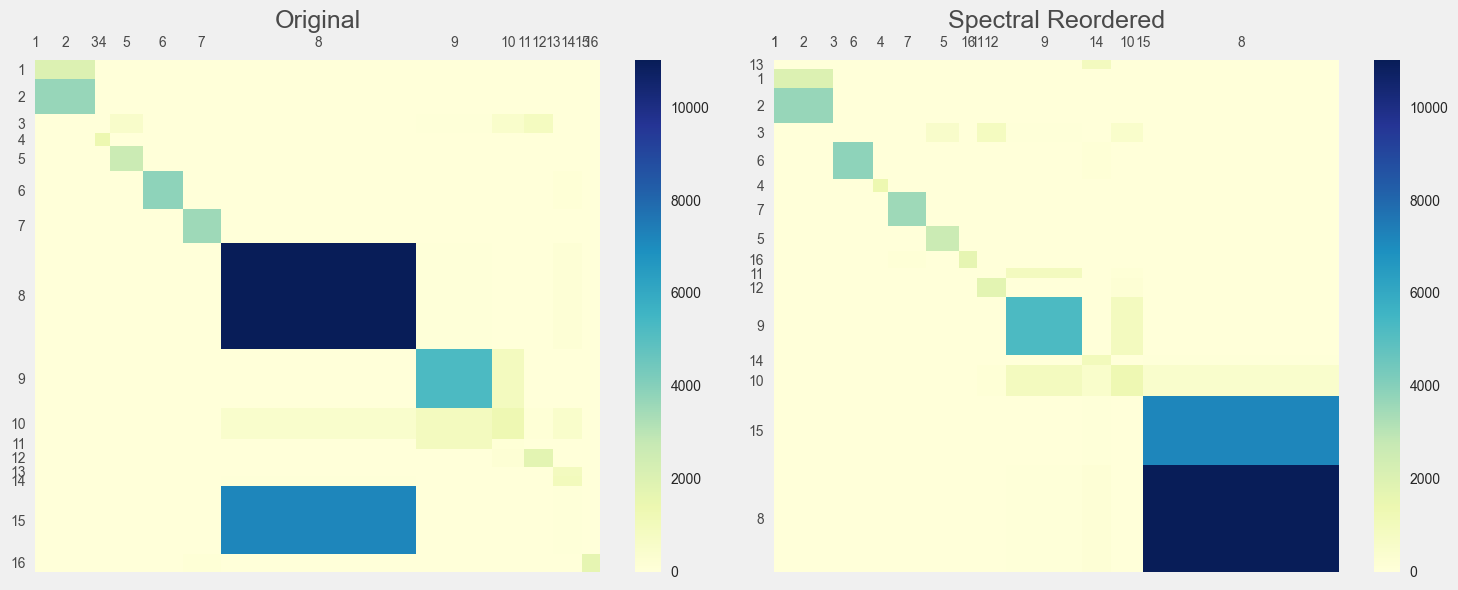

In [12]:


# Visualize original vs spectrally reordered matrices
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

mosaic_heatmap(conf_mat, ax=ax1, xticklabels=labels, yticklabels=labels, cmap="YlGnBu")
ax1.set_title("Original", fontsize=18, color='#4A4A4A')  # Medium gray
ax1.xaxis.set_ticks_position('top')
ax1.tick_params(colors='#4A4A4A')

mosaic_heatmap(
    reordered_mat,
    ax=ax2,
    xticklabels=reordered_labels,
    yticklabels=reordered_labels,
    cmap="YlGnBu",
)
ax2.set_title("Spectral Reordered", fontsize=18, color='#4A4A4A')  # Medium gray
ax2.xaxis.set_ticks_position('top')
ax2.tick_params(colors='#4A4A4A')

plt.tight_layout()
plt.show()

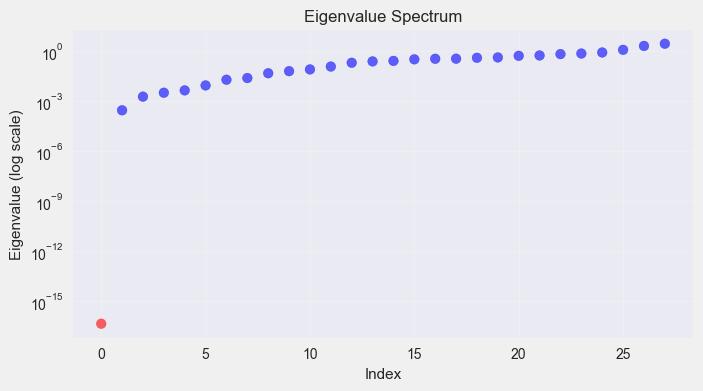

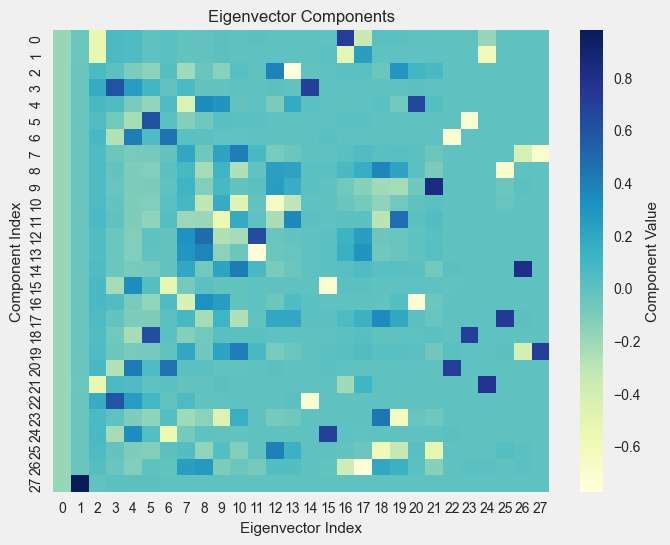

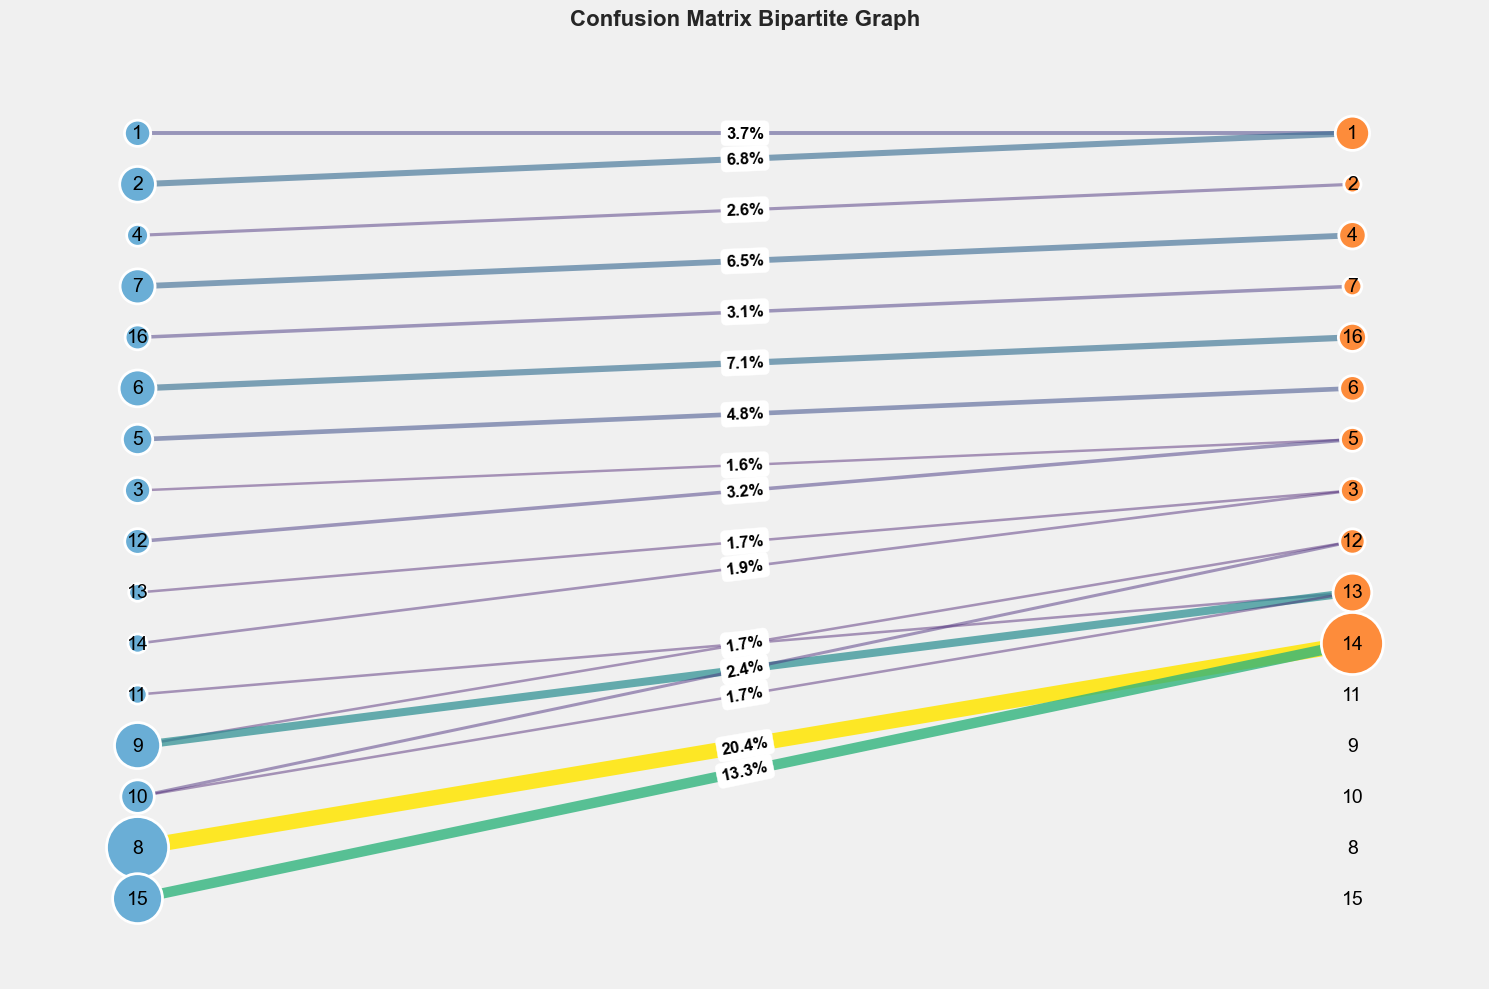

In [13]:
conf_mat = raw_conf_mat

# spectral reordering
reordered_mat, reordered_labels = spectral_permute(conf_mat, labels, mode='tw')


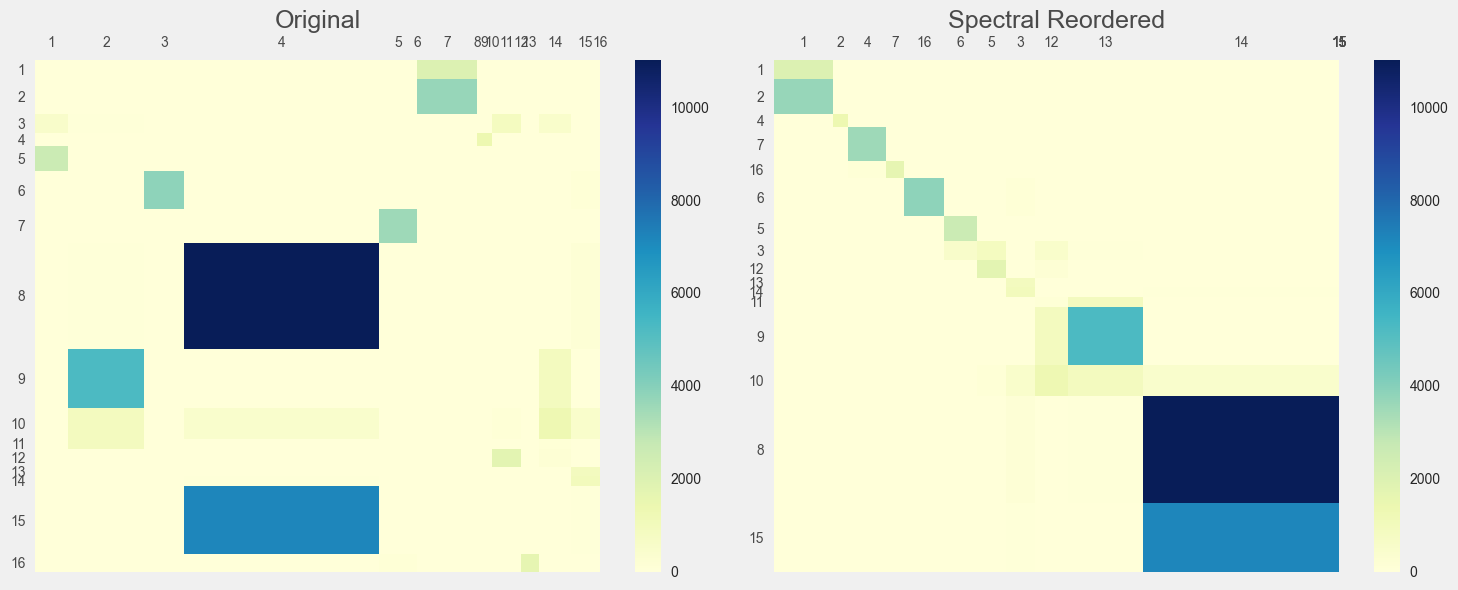

In [14]:
# Visualize original vs spectrally reordered matrices
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

mosaic_heatmap(conf_mat, ax=ax1, xticklabels=labels, yticklabels=labels, cmap="YlGnBu")
ax1.set_title("Original", fontsize=18, color='#4A4A4A')  # Medium gray
ax1.xaxis.set_ticks_position('top')
ax1.tick_params(colors='#4A4A4A')

mosaic_heatmap(
    reordered_mat,
    ax=ax2,
    xticklabels=reordered_labels,
    yticklabels=reordered_labels,
    cmap="YlGnBu",
)
ax2.set_title("Spectral Reordered", fontsize=18, color='#4A4A4A')  # Medium gray
ax2.xaxis.set_ticks_position('top')
ax2.tick_params(colors='#4A4A4A')

plt.tight_layout()
plt.show()

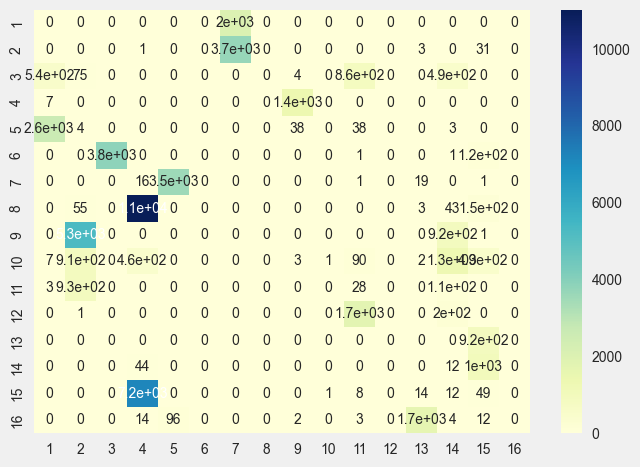

In [15]:
import seaborn as sns
sns.heatmap(conf_mat, annot=True, cmap="YlGnBu", xticklabels=labels, yticklabels=labels)
plt.show()

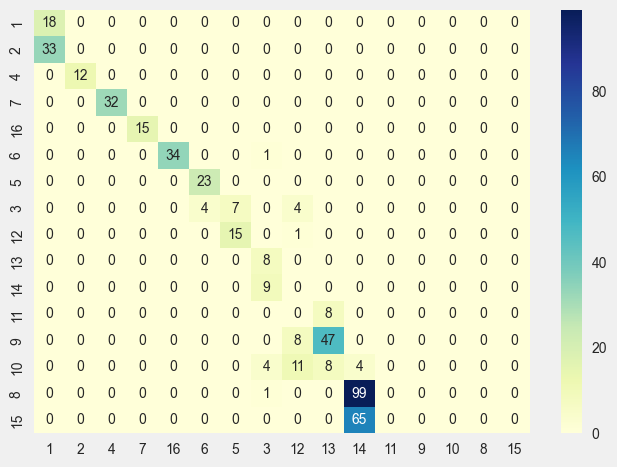

In [16]:
sns.heatmap(reordered_mat / np.max(reordered_mat) // 0.01, annot=True, cmap="YlGnBu", xticklabels=reordered_labels, yticklabels=reordered_labels)
plt.show()

In [17]:
print(np.unique(y_true))
print(np.unique(y_pred))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
